## **MSc Major Research Project**

## **Exploring the effect of daytime physical activity on sleep quality**

Melania Czobit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

## **Daytime activity analysis**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
path = '/content/drive/My Drive/MRP/FitbitActivity.csv'
df = pd.read_csv(path)
df.head()

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
0,44869,2015-07-28,91,86.669746,11.979352,4034.0,1.0,1034.0,149.0,2.0,12.0,1211,75,9,4,1364.19900,159.79671,61.841969,35.46954
1,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,0.0,1273,103,3,0,1322.14650,262.28818,11.997700,0.00000
2,44869,2015-07-30,100,83.281448,16.863153,3660.0,0.0,795.0,139.0,3.0,18.0,1267,109,15,16,1288.98170,232.89841,77.910057,127.26234
3,44869,2015-07-31,80,91.707787,12.464956,6016.0,13.0,954.0,259.0,0.0,0.0,846,295,2,0,954.04791,629.57526,2.224320,0.00000
4,44869,2015-08-01,78,101.268140,10.464320,9846.0,5.0,1078.0,282.0,24.0,8.0,628,502,0,0,702.88513,1080.83410,0.000000,0.00000


In [ ]:
df.shape

(357827, 19)

In [35]:
df['datadate'] = pd.to_datetime(df['datadate'])
df = df.rename(columns={'datadate': 'date'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357827 entries, 0 to 357826
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   egoid                 357827 non-null  int64         
 1   datadate              357827 non-null  datetime64[ns]
 2   complypercent         357827 non-null  int64         
 3   meanrate              357827 non-null  float64       
 4   sdrate                357826 non-null  float64       
 5   steps                 356751 non-null  float64       
 6   floors                356927 non-null  float64       
 7   sedentaryminutes      355844 non-null  float64       
 8   lightlyactiveminutes  355844 non-null  float64       
 9   fairlyactiveminutes   357823 non-null  float64       
 10  veryactiveminutes     355844 non-null  float64       
 11  lowrangemins          357827 non-null  int64         
 12  fatburnmins           357827 non-null  int64         
 13 

In [ ]:
df.describe()

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,357827.000000,357827.000000,357827.000000,357826.000000,356751.000000,356927.000000,355844.000000,355844.000000,357823.000000,355844.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000,357827.000000
mean,56376.037180,85.228499,74.001024,15.430787,11051.223360,17.236592,798.992190,203.326781,25.326321,31.179885,1100.332739,113.356653,4.134316,0.953796,1698.248551,557.377978,38.888236,10.776925
std,25759.271748,22.456762,9.594119,4.220816,5873.476411,19.416539,265.477736,97.808326,30.709126,36.190696,314.921616,103.457654,9.883374,4.534229,633.774136,511.034060,99.952610,54.906745
min,10237.000000,1.000000,40.174862,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33740.000000,83.000000,67.280514,12.597967,6948.000000,7.000000,631.000000,151.000000,4.000000,2.000000,1004.000000,39.000000,0.000000,0.000000,1328.779700,185.058885,0.000000,0.000000
50%,56543.000000,96.000000,73.469315,15.047787,10592.000000,13.000000,728.000000,205.000000,16.000000,20.000000,1219.000000,86.000000,0.000000,0.000000,1709.270400,432.766390,0.000000,0.000000
75%,79167.000000,98.000000,80.047359,17.926842,14458.000000,21.000000,871.000000,261.000000,35.000000,47.000000,1315.000000,156.000000,3.000000,0.000000,2117.576800,776.951845,24.386604,0.000000
max,99978.000000,100.000000,190.721850,66.399506,87677.000000,670.000000,1440.000000,937.000000,506.000000,650.000000,1440.000000,1344.000000,343.000000,428.000000,5644.347200,8111.299800,4543.892100,4822.670900


In [ ]:
df.isnull().sum()

egoid                      0
datadate                   0
complypercent              0
meanrate                   0
sdrate                     1
steps                   1076
floors                   900
sedentaryminutes        1983
lightlyactiveminutes    1983
fairlyactiveminutes        4
veryactiveminutes       1983
lowrangemins               0
fatburnmins                0
cardiomins                 0
peakmins                   0
lowrangecal                0
fatburncal                 0
cardiocal                  0
peakcal                    0
dtype: int64

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

egoid - 0.0%
datadate - 0.0%
complypercent - 0.0%
meanrate - 0.0%
sdrate - 0.0%
steps - 0.301%
floors - 0.252%
sedentaryminutes - 0.554%
lightlyactiveminutes - 0.554%
fairlyactiveminutes - 0.001%
veryactiveminutes - 0.554%
lowrangemins - 0.0%
fatburnmins - 0.0%
cardiomins - 0.0%
peakmins - 0.0%
lowrangecal - 0.0%
fatburncal - 0.0%
cardiocal - 0.0%
peakcal - 0.0%


In [ ]:
# print(df.groupby('egoid').isnull().sum())
# df.isnull().groupby(df['egoid']).sum().to_dict()
df.isnull().groupby(df['egoid']).sum()

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
egoid,,,,,,,,,,,,,,,,,,,
10237,0,0,0,0,0,0,8,18,18,0,18,0,0,0,0,0,0,0,0
10469,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0
10547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11002,0,0,0,0,0,0,12,18,18,0,18,0,0,0,0,0,0,0,0
11128,0,0,0,0,0,1,8,18,18,0,18,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98760,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
98766,0,0,0,0,0,0,10,18,18,0,18,0,0,0,0,0,0,0,0


In [ ]:
df[df['egoid']==10237].isnull().sum()

egoid                    0
datadate                 0
complypercent            0
meanrate                 0
sdrate                   0
steps                    0
floors                   8
sedentaryminutes        18
lightlyactiveminutes    18
fairlyactiveminutes      0
veryactiveminutes       18
lowrangemins             0
fatburnmins              0
cardiomins               0
peakmins                 0
lowrangecal              0
fatburncal               0
cardiocal                0
peakcal                  0
dtype: int64

In [ ]:
df['egoid'].value_counts()

23287    1406
77036    1399
70125    1396
67918    1392
22138    1378
         ... 
13928       9
63954       4
57045       4
85453       1
92895       1
Name: egoid, Length: 623, dtype: int64

In [ ]:
df_time = pd.DataFrame()
df_time['timestamp_dt'] = pd.to_datetime(df['datadate'], format='%Y-%m-%d')
df_time['year'] = df_time['timestamp_dt'].dt.year
df_time['month'] = df_time['timestamp_dt'].dt.month
df_time['weekday'] = df_time['timestamp_dt'].dt.weekday
df_time

,timestamp_dt,year,month,weekday
0,2015-07-28,2015,7,1
1,2015-07-29,2015,7,2
2,2015-07-30,2015,7,3
3,2015-07-31,2015,7,4
4,2015-08-01,2015,8,5
...,...,...,...,...
357822,2018-03-30,2018,3,4
357823,2018-03-31,2018,3,5
357824,2018-04-01,2018,4,6
357825,2018-04-02,2018,4,0


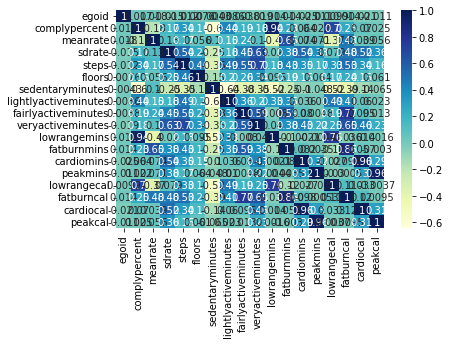

In [ ]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

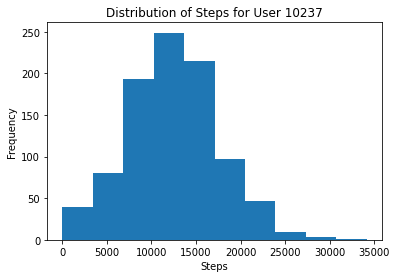

In [ ]:
import matplotlib.pyplot as plt

data = df[df['egoid']==10237]
plt.hist(data['steps'])
plt.title("Distribution of Steps for User 10237")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

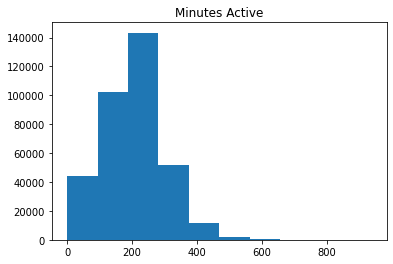

In [ ]:
active = df['lightlyactiveminutes']
plt.hist(active)
plt.title("Minutes Active")
plt.show()

## **Sleep Dataset Analysis**

In [6]:
path_sleep = '/content/drive/My Drive/MRP/FitbitSleep.csv'
df_sleep = pd.read_csv(path_sleep)
df_sleep

,egoid,dataDate,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
0,44869,2015-07-28,6:25:00,10:27:00,243,0,0,232,11,0.954733
1,44869,2015-07-29,3:26:30,7:21:30,236,1,4,216,15,0.935065
2,44869,2015-07-29,12:03:30,16:44:30,282,3,0,267,12,0.956989
3,44869,2015-07-30,6:27:30,14:31:30,485,4,0,451,30,0.937630
4,44869,2015-07-31,4:40:30,6:27:30,108,0,0,100,8,0.925926
...,...,...,...,...,...,...,...,...,...,...
333703,35925,2017-11-13,23:45:00,9:15:00,571,0,0,533,38,0.933450
333704,35925,2017-11-16,23:16:30,8:20:30,545,0,1,489,55,0.898897
333705,35925,2017-11-26,4:19:00,8:43:00,265,6,1,249,9,0.965116
333706,35925,2017-12-17,17:55:30,19:11:30,77,2,3,70,2,0.972222


In [7]:
df_sleep['dataDate'] = pd.to_datetime(df_sleep['dataDate'])

In [9]:
df_sleep = df_sleep.rename(columns={'dataDate': 'date'})

In [10]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333708 entries, 0 to 333707
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   egoid             333708 non-null  int64         
 1   date              333708 non-null  datetime64[ns]
 2   timetobed         333708 non-null  object        
 3   timeoutofbed      333706 non-null  object        
 4   bedtimedur        333708 non-null  int64         
 5   minstofallasleep  333708 non-null  int64         
 6   minsafterwakeup   333708 non-null  int64         
 7   minsasleep        333708 non-null  int64         
 8   minsawake         333708 non-null  int64         
 9   Efficiency        333708 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 25.5+ MB


In [8]:
# df_sleep2 = df_sleep.resample('D').ffill()
# df_sleep2

In [11]:
df_sleep.shape

(333708, 10)

In [ ]:
df_sleep.isnull().sum()

egoid               0
dataDate            0
timetobed           0
timeoutofbed        2
bedtimedur          0
minstofallasleep    0
minsafterwakeup     0
minsasleep          0
minsawake           0
Efficiency          0
dtype: int64

In [ ]:
df_sleep.describe()

,egoid,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
count,333708.000000,333708.000000,333708.000000,333708.000000,333708.000000,333708.000000,333708.000000
mean,56539.389676,405.320771,2.441008,1.129958,376.751762,24.998043,0.937925
std,25815.808136,147.346474,4.471660,4.171883,139.848851,27.886942,0.065011
min,10237.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.055556
25%,33740.000000,340.000000,0.000000,0.000000,312.000000,10.000000,0.922727
50%,57325.000000,432.000000,2.000000,0.000000,403.000000,19.000000,0.949495
75%,79341.000000,501.000000,3.000000,1.000000,469.000000,32.000000,0.970149
max,99978.000000,1370.000000,381.000000,281.000000,1295.000000,561.000000,1.000000


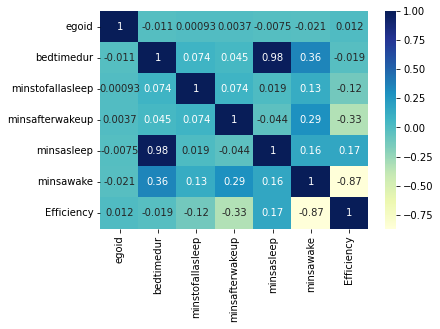

In [ ]:
corr_matrix=df_sleep.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

In [ ]:
df_sleep['egoid'].value_counts()

22455    1752
43382    1619
94641    1616
84390    1576
14847    1504
         ... 
85453       2
76791       2
63954       1
92895       1
78667       1
Name: egoid, Length: 622, dtype: int64

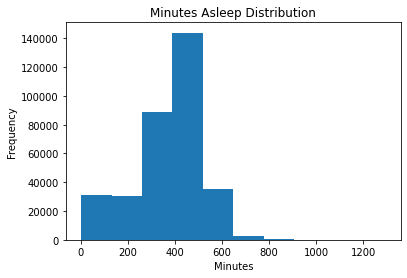

In [ ]:
sleep = df_sleep['minsasleep']
plt.hist(sleep)
plt.title("Minutes Asleep Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**Merging the two datasets**

In [12]:
daily_ids = df['egoid'].value_counts().index.to_list()
# sleep_ids = df_sleep['egoid_sleep'].value_counts().index.to_list()
sleep_ids = df_sleep['egoid'].value_counts().index.to_list()

In [13]:
missing_id = [item for item in daily_ids if item not in sleep_ids]
print(missing_id)
missing_id2 =  [item for item in sleep_ids if item not in daily_ids]
print(missing_id2)

[55340]
[]


In [37]:
# remove egoid 55340 as no sleep data collected
df = df[df.egoid != 55340]

In [38]:
daily = df['egoid'].value_counts().to_dict()
sleep = df_sleep['egoid'].value_counts().to_dict()

print(daily)
print(sleep)

{23287: 1406, 77036: 1399, 70125: 1396, 67918: 1392, 22138: 1378, 77711: 1372, 92566: 1369, 38610: 1368, 63347: 1365, 22688: 1356, 21932: 1350, 14737: 1347, 43382: 1345, 22455: 1344, 64296: 1342, 84390: 1333, 95559: 1330, 71985: 1328, 46558: 1324, 71089: 1324, 66815: 1324, 82986: 1320, 92515: 1320, 57443: 1319, 48154: 1316, 67334: 1305, 46418: 1304, 33009: 1304, 24883: 1304, 34062: 1298, 78783: 1298, 14279: 1297, 67709: 1296, 27306: 1292, 94641: 1283, 51437: 1283, 83566: 1280, 33657: 1280, 63138: 1280, 25197: 1278, 95543: 1278, 88882: 1278, 98700: 1272, 36552: 1271, 72885: 1262, 62246: 1262, 92412: 1261, 96610: 1261, 63904: 1260, 49086: 1258, 39146: 1252, 25548: 1247, 44927: 1244, 27407: 1242, 99733: 1242, 83005: 1233, 23270: 1228, 33785: 1228, 95585: 1225, 14847: 1222, 67608: 1217, 34467: 1215, 42137: 1212, 26320: 1212, 22913: 1210, 71193: 1210, 85503: 1202, 92038: 1202, 72348: 1202, 73158: 1201, 67177: 1196, 26858: 1195, 98117: 1187, 43794: 1182, 17308: 1177, 36117: 1177, 52302: 1175

In [23]:
daily.keys() == sleep.keys()

True

In [39]:
remove_daily = []
remove_sleep = []

for key in daily:
  if daily[key] < 100:
    remove_daily.append(key)

for key in sleep:
  if sleep[key] < 100:
    remove_sleep.append(key)


remove_ids = list(set(remove_daily + remove_sleep))
print(remove_ids)

[88963, 19460, 90502, 28681, 76810, 74251, 24079, 42132, 82964, 21909, 90136, 92953, 38554, 44447, 56480, 27169, 66979, 33445, 65061, 40231, 34344, 14763, 17581, 14511, 31538, 10547, 52277, 54837, 20665, 29115, 33084, 67771, 93246, 98624, 12738, 89411, 86083, 66629, 31045, 92618, 78667, 57292, 67917, 32249, 85453, 39248, 40569, 24016, 45776, 63954, 57045, 67544, 73693, 30814, 92895, 15586, 14690, 80484, 33127, 13928, 76521, 61289, 35180, 46701, 37485, 43507, 70005, 76791, 19833, 48891, 57854]


In [40]:
for id in remove_ids:
  df = df[df.egoid != id]
  df_sleep = df_sleep[df_sleep.egoid != id]

In [30]:
# for key in daily:
#     if key in sleep:
#       print(key, daily[key], sleep[key])

In [42]:
df_all = df.merge(df_sleep, how='inner', on=["egoid","date"])
df_all

,egoid,date,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,...,cardiocal,peakcal,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
0,44869,2015-07-28,91,86.669746,11.979352,4034.0,1.0,1034.0,149.0,2.0,...,61.841969,35.46954,6:25:00,10:27:00,243,0,0,232,11,0.954733
1,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,...,11.997700,0.00000,3:26:30,7:21:30,236,1,4,216,15,0.935065
2,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,...,11.997700,0.00000,12:03:30,16:44:30,282,3,0,267,12,0.956989
3,44869,2015-07-30,100,83.281448,16.863153,3660.0,0.0,795.0,139.0,3.0,...,77.910057,127.26234,6:27:30,14:31:30,485,4,0,451,30,0.937630
4,44869,2015-07-31,80,91.707787,12.464956,6016.0,13.0,954.0,259.0,0.0,...,2.224320,0.00000,4:40:30,6:27:30,108,0,0,100,8,0.925926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328007,35925,2017-11-13,85,70.777321,15.921599,4748.0,5.0,658.0,211.0,0.0,...,0.000000,0.00000,23:45:00,9:15:00,571,0,0,533,38,0.933450
328008,35925,2017-11-16,82,71.740677,16.367147,6612.0,13.0,694.0,167.0,27.0,...,0.000000,0.00000,23:16:30,8:20:30,545,0,1,489,55,0.898897
328009,35925,2017-11-26,70,73.942635,20.251505,9676.0,14.0,920.0,136.0,67.0,...,32.175831,0.00000,4:19:00,8:43:00,265,6,1,249,9,0.965116
328010,35925,2017-12-17,64,73.434593,15.791707,4745.0,7.0,1193.0,131.0,34.0,...,0.000000,0.00000,17:55:30,19:11:30,77,2,3,70,2,0.972222


In [47]:
df_all.isnull().sum()

egoid                      0
date                       0
complypercent              0
meanrate                   0
sdrate                     0
steps                     80
floors                   857
sedentaryminutes        1888
lightlyactiveminutes    1888
fairlyactiveminutes        4
veryactiveminutes       1888
lowrangemins               0
fatburnmins                0
cardiomins                 0
peakmins                   0
lowrangecal                0
fatburncal                 0
cardiocal                  0
peakcal                    0
timetobed                  0
timeoutofbed               2
bedtimedur                 0
minstofallasleep           0
minsafterwakeup            0
minsasleep                 0
minsawake                  0
Efficiency                 0
dtype: int64